In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
import fundamentus
import yfinance as yf

## Teste de valor intrínseco

          Date  Stock Price  Book Value per Share
0   2024-04-23        59.09                   NaN
1   2024-01-31        54.90                 11.22
2   2023-10-31        54.08                 10.59
3   2023-07-31        52.72                 10.57
4   2023-04-30        49.60                  9.80
..         ...          ...                   ...
57  2009-10-31        12.03                  6.06
58  2009-07-31        12.01                  5.92
59  2009-04-30        12.07                  5.47
60  2009-01-31        11.22                  5.70
61  2018-04-30        26.57                  8.85

[62 rows x 3 columns]


<Axes: xlabel='Date'>

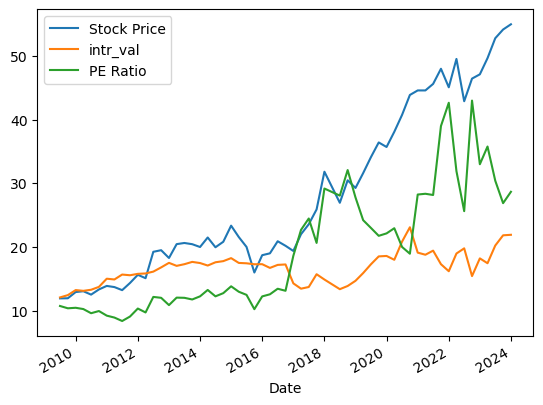

In [5]:
# dados históricos da wallmart!
# encontra em https://www.macrotrends.net/stocks/charts/WMT/walmart/price-book

data = {
    'Date': ['2024-04-23', '2024-01-31', '2023-10-31', '2023-07-31', '2023-04-30', '2023-01-31', '2022-10-31', '2022-07-31', '2022-04-30', '2022-01-31', 
             '2021-10-31', '2021-07-31', '2021-01-31', '2020-10-31', '2020-07-31', '2020-04-30', '2020-01-31', '2021-04-30', '2019-10-31', '2019-07-31', 
             '2019-04-30', '2019-01-31', '2018-10-31', '2018-01-31', '2017-10-31', '2017-07-31', '2017-04-30', '2017-01-31', '2018-07-31', '2016-10-31', 
             '2016-07-31', '2016-04-30', '2016-01-31', '2015-10-31', '2015-07-31', '2015-04-30', '2015-01-31', '2014-10-31', '2014-07-31', '2014-04-30', 
             '2014-01-31', '2013-10-31', '2013-07-31', '2013-04-30', '2013-01-31', '2012-10-31', '2012-07-31', '2012-04-30', '2012-01-31', '2011-10-31', 
             '2011-07-31', '2011-04-30', '2011-01-31', '2010-10-31', '2010-07-31', '2010-04-30', '2010-01-31', '2009-10-31', '2009-07-31'],
    'Stock Price': [59.09, 54.90, 54.08, 52.72, 49.60, 47.07, 46.40, 42.86, 49.48, 45.04, 47.94, 45.57, 44.55, 43.84, 40.72, 38.08, 35.70, 44.55, 36.41, 
                    34.10, 31.61, 29.29, 30.49, 31.83, 25.93, 23.61, 22.05, 19.43, 26.97, 20.24, 20.95, 19.06, 18.77, 16.06, 20.06, 21.61, 23.39, 20.87, 
                    20.01, 21.54, 20.05, 20.49, 20.68, 20.50, 18.33, 19.55, 19.30, 15.17, 15.70, 14.42, 13.30, 13.78, 13.96, 13.41, 12.60, 13.13, 13.00, 
                    12.03, 12.01],
    'TTM Net EPS': [None, '$1.91', '$2.01', '$1.73', '$1.39', '$1.43', '$1.08', '$1.67', '$1.55', '$1.06', '$1.23', '$1.62', '$1.58', '$2.31', '$2.03', 
                     '$1.66', '$1.61', '$1.57', '$1.67', '$1.48', '$1.30', '$1.05', '$0.95', '$1.09', '$1.25', '$0.96', '$0.97', '$1.04', '$0.96', '$1.53', 
                     '$1.55', '$1.51', '$1.52', '$1.56', '$1.60', '$1.66', '$1.68', '$1.63', '$1.62', '$1.62', '$1.63', '$1.73', '$1.71', '$1.69', '$1.67', 
                     '$1.62', '$1.58', '$1.55', '$1.51', '$1.57', '$1.57', '$1.53', '$1.50', '$1.34', '$1.30', '$1.27', '$1.23', '$1.15', '$1.11'],
    'PE Ratio': [30.88, 28.69, 26.91, 30.42, 35.77, 33.00, 42.96, 25.66, 31.92, 42.62, 38.98, 28.19, 28.26, 19.00, 20.06, 22.99, 22.18, 28.38, 21.80, 23.04, 
                  24.25, 27.81, 32.09, 29.20, 20.69, 24.51, 22.73, 18.68, 28.09, 13.20, 13.52, 12.65, 12.32, 10.32, 12.56, 13.05, 13.90, 12.83, 12.33, 13.33, 
                  12.33, 11.84, 12.10, 12.13, 10.96, 12.10, 12.24, 9.81, 10.42, 9.17, 8.47, 9.01, 9.31, 10.03, 9.69, 10.34, 10.54, 10.46, 10.82]
}


df1 = pd.DataFrame(data)
# Replacing '$' with empty string and converting 'TTM Net EPS' column to numeric
df1['TTM Net EPS'] = pd.to_numeric(df1['TTM Net EPS'].str.replace('$', ''), errors='coerce')


data = {
    'Date': ['2024-04-23', '2024-01-31', '2023-10-31', '2023-07-31', '2023-04-30', '2023-01-31', '2022-10-31', '2022-07-31', '2022-04-30', '2022-01-31', 
             '2021-10-31', '2021-07-31', '2021-01-31', '2020-10-31', '2020-07-31', '2020-04-30', '2020-01-31', '2021-04-30', '2019-10-31', '2019-07-31', 
             '2019-04-30', '2019-01-31', '2018-10-31', '2018-01-31', '2017-10-31', '2017-07-31', '2017-04-30', '2017-01-31', '2018-07-31', '2016-10-31', 
             '2016-07-31', '2016-04-30', '2016-01-31', '2015-10-31', '2015-07-31', '2015-04-30', '2015-01-31', '2014-10-31', '2014-07-31', '2014-04-30', 
             '2014-01-31', '2013-10-31', '2013-07-31', '2013-04-30', '2013-01-31', '2012-10-31', '2012-07-31', '2012-04-30', '2012-01-31', '2011-10-31', 
             '2011-07-31', '2011-04-30', '2011-01-31', '2010-10-31', '2010-07-31', '2010-04-30', '2010-01-31', '2009-10-31', '2009-07-31', '2009-04-30', 
             '2009-01-31', '2018-04-30'],
    'Stock Price': [59.09, 54.90, 54.08, 52.72, 49.60, 47.07, 46.40, 42.86, 49.48, 45.04, 47.94, 45.57, 44.55, 43.84, 40.72, 38.08, 35.70, 44.55, 36.41, 
                    34.10, 31.61, 29.29, 30.49, 31.83, 25.93, 23.61, 22.05, 19.43, 26.97, 20.24, 20.95, 19.06, 18.77, 16.06, 20.06, 21.61, 23.39, 20.87, 
                    20.01, 21.54, 20.05, 20.49, 20.68, 20.50, 18.33, 19.55, 19.30, 15.17, 15.70, 14.42, 13.30, 13.78, 13.96, 13.41, 12.60, 13.13, 13.00, 
                    12.03, 12.01, 12.07, 11.22, 26.57],
    'Book Value per Share': [None, '$11.22', '$10.59', '$10.57', '$9.80', '$10.37', '$9.89', '$10.48', '$10.38', '$11.09', '$10.89', '$10.41', '$10.34', 
                             '$10.30', '$9.55', '$8.72', '$9.60', '$10.05', '$9.19', '$9.03', '$8.72', '$9.22', '$9.10', '$9.13', '$8.86', '$8.80', '$8.39', 
                             '$8.81', '$8.38', '$8.71', '$8.53', '$8.29', '$8.81', '$8.58', '$8.51', '$8.26', '$8.87', '$8.68', '$8.56', '$8.07', '$8.39', 
                             '$8.07', '$7.83', '$7.69', '$8.22', '$7.80', '$7.38', '$7.26', '$7.39', '$6.92', '$7.01', '$6.51', '$6.75', '$6.33', '$6.10', 
                             '$6.09', '$6.40', '$6.06', '$5.92', '$5.47', '$5.70', '$8.85'],
    
}
df2 = pd.DataFrame(data)
# Replacing '$' with empty string and converting 'Book Value per Share' column to numeric
df2['Book Value per Share'] = pd.to_numeric(df2['Book Value per Share'].str.replace('$', ''), errors='coerce')

print(df2)




df1['Date'] = df1['Date'].apply(lambda x: pd.to_datetime(x[:7], format='%Y-%m'))
df2['Date'] = df2['Date'].apply(lambda x: pd.to_datetime(x[:7], format='%Y-%m'))


dfc = pd.merge(df1,df2.drop('Stock Price',axis=1),on='Date',how='inner').dropna()
dfc['intr_val'] = round((dfc['TTM Net EPS']*dfc['Book Value per Share']*22.5)**0.5,2)
dfc.set_index('Date')[['Stock Price','intr_val','PE Ratio']].plot()

## reach cheap companies (iv)

In [6]:
df_fund = fundamentus.get_resultado()
df_fund.head()
df_fund['vpa'] = df_fund.index.map(lambda x: yf.Ticker(x+'.SA').info.get('bookValue'))
df_fund['lpa'] = df_fund.index.map(lambda x: yf.Ticker(x+'.SA').info.get('trailingEps'))
df_fund['intvalue'] = (df_fund['lpa']* df_fund['vpa']*22.5)**0.5

c:\Users\OtavioDaflon\anaconda3\Lib\site-packages\fundamentus\resultado.py:50: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(content.text, decimal=",", thousands='.')[0]
2024-04-26 17:15:26,279 [quote._fetch] ERROR: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABYA3.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABYA3.SA&crumb=djBS29YyoVk
2024-04-26 17:15:34,885 [quote._fetch] ERROR: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AGEN33.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AGEN33.SA&crumb=djBS29YyoVk
2024-04-26 17:15:36,624 [quote._fetch] ERROR: 404 C

KeyboardInterrupt: 

In [ ]:
df_fund.dropna(subset='intvalue',inplace=True)


In [ ]:
# conds=[
#     df_fund['cotacao']<df_fund['intvalue'],
#     df_fund['cotacao']<df_fund['intvalue']
# ]

df_fund['safemargin'] = df_fund['intvalue']*0.75
df_fund['safe'] = np.where(df_fund['safemargin']>df_fund['cotacao'],True,False)
df_fund['margin_score'] = df_fund['safemargin']/df_fund['cotacao']# quanto maior melhor (se for menor que 1, não está na margem)

In [ ]:
fig = px.scatter(df_fund,x=df_fund.index,y='margin_score',color='safe')
fig.show()

In [ ]:
def soft_filter(df:pd.DataFrame=df_fund):
    filt1 = df.evebit<15 #ev/ebit > 15% #
    filt2 = df.roe>0.10 #ROA > 10% (como não tem, vamos tentar o roe e roic )
    filt3 = df.roic>0.10
    filt4 = df.c5y>0.1
    filt5 = df.dy>0.075
    filt6 = df.mrgliq>0.1
    return df[(filt1) & (filt2) & (filt3)& (filt4)& (filt5) & (filt6)]

def hard_filter(df:pd.DataFrame=df_fund):
    filt1 = df.evebit<15 #ev/ebit > 15% #
    filt2 = df.roe>0.10 #ROA > 10% (como não tem, vamos tentar o roe e roic )
    filt3 = df.roic>0.10
    filt4 = df.c5y>0.1
    filt5 = df.dy>0.06
    filt6 = df.mrgliq<0.1
    return df[(filt1) & (filt2) & (filt3)& (filt4)& (filt5) & (filt6)]

#Checar evolução dos lucros para excluir momentos instantâneaos
#Checar crescimento em 5 anos
df_soft = soft_filter(df_fund)
df_hard = hard_filter(df_fund)
df_soft.sort_values('mrgliq')


Multiples,cotacao,pl,pvp,psr,dy,pa,pcg,pebit,pacl,evebit,...,liq2m,patrliq,divbpatr,c5y,vpa,lpa,intvalue,safemargin,safe,margin_score
papel,,,,,,,,,,,,,,,,,,,,,
GOAU3,10.87,4.38,0.67,0.163,0.1418,0.149,0.62,1.23,2.89,1.81,...,7.988920e+05,1.676100e+10,0.65,0.1898,16.230,2.48,30.093754,22.570315,True,2.076386
GOAU4,10.59,4.27,0.65,0.159,0.1456,0.145,0.60,1.20,2.82,1.78,...,7.653610e+07,1.676100e+10,0.65,0.1898,16.230,2.48,30.093754,22.570315,True,2.131286
CEEB3,38.78,5.53,1.58,0.670,0.1136,0.365,-11.46,2.54,-0.66,5.86,...,4.136190e+04,6.437000e+09,2.22,0.1055,24.560,6.69,60.802089,45.601567,True,1.175904
CEEB5,36.86,5.25,1.50,0.637,0.1195,0.346,-10.89,2.41,-0.63,5.73,...,8.990000e+01,6.437000e+09,2.22,0.1055,24.560,6.69,60.802089,45.601567,True,1.237156
EQMA3B,29.50,6.23,1.29,0.854,0.0947,0.518,6.23,3.79,-1.60,5.50,...,9.696980e+03,3.756470e+09,0.84,0.1017,22.880,4.73,49.345760,37.009320,True,1.254553
REDE3,6.94,8.83,3.64,0.908,0.1036,0.530,10.54,3.49,-1.07,5.81,...,3.136560e+04,4.022100e+09,3.09,0.1075,1.906,0.79,5.820580,4.365435,False,0.629025
CMIG3,14.71,5.62,1.31,0.879,0.0806,0.589,-26.46,4.32,-1.75,5.32,...,5.775940e+06,2.464920e+10,0.40,0.1115,11.202,2.38,24.492184,18.369138,True,1.248752
CMIG4,12.82,4.90,1.14,0.766,0.0925,0.513,-23.06,3.76,-1.53,4.76,...,1.523740e+08,2.464920e+10,0.40,0.1115,11.202,2.38,24.492184,18.369138,True,1.432850
FESA4,8.16,7.53,0.90,1.184,0.0840,0.701,2.66,7.66,4.33,6.24,...,6.609640e+06,3.190100e+09,0.09,0.2150,9.372,1.06,14.950659,11.212994,True,1.374141


In [ ]:
df_plot = pd.DataFrame((df_soft/df_soft.max()).mean(),columns=['values'])

df_plot2 = (df_soft/df_soft.max())[(df_soft/df_soft.max())['safe']==False].mean()
fig = px.bar(df_plot,x=df_plot.index,y='values',barmode='group')

fig.add_bar(x=df_plot2.index,y=df_plot2.values)
fig.show()

## Using the recommendation as comparison to ibovespa and sp500

In [ ]:
start = '2014-04-24 00:00:00-03:00'
end = '2024-04-23 00:00:00-03:00'

In [ ]:
import json
assets = json.load(open('../assets.json'))['personal_wallet']
# for stock list filtered in df_soft
def portifolio_results(stock_list:list=list(df_soft.index)):
    """ 
    For future versions: put  different weights feature
    to allow simulation of not inbalanced portifolio. 
    Possibly with a dictionary of weights
    """
    df_ = pd.DataFrame({})
    for i in stock_list:
        print(i)
        serie = yf.Ticker(i+'.SA').history(period='10y')['Close'][start:end] # ajustar para firmar inicio e fim
        try:
            df_[i] = serie.values
            safe = serie.copy()
        except ValueError:
            print(f'excluindo {i} por falta de dados')
            pass
    print('preliminar:',df_.head())
    df_.index = safe.index
    print('reindexado:',df_.head())
    returns = df_.pct_change()
    print('percent:',df_.head())
    cumulative = (1+returns).cumprod()
    cumret = cumulative.sum(axis=1)
    total = cumret/len(df_.columns) # assuming same weight for each stock
    return pd.DataFrame(total,columns=['totalreturn'])
# same for index fund
def index_fund_results(fund_code:str='^BVSP'):
    sp500 = yf.Ticker(fund_code).history(period='10y')['Close'][start:end] 
    
    returns = sp500.pct_change()
    print('teste1:',returns.shape)
    cumulative = (1+returns).cumprod()
    print('teste2:',cumulative.shape)
    return cumulative.to_frame()
portifolio = portifolio_results(df_soft.index)
real_bal_portifolio = portifolio_results(assets)
ibov = index_fund_results()
sp500 = index_fund_results('^GSPC')

CEEB3
CEEB5
CMIG3
CMIG4
CMIN3
excluindo CMIN3 por falta de dados
EQMA3B
FESA4
GOAU3
GOAU4
KEPL3
LEVE3
PETR3
PETR4
RANI3
REDE3
TRPL4
UNIP5
UNIP6
VULC3
preliminar:        CEEB3      CEEB5     CMIG3     CMIG4    EQMA3B     FESA4     GOAU3  \
0  10.080224  13.960242  5.090703  3.994776  7.772187  1.643196  7.406147   
1  10.080224  13.960242  4.950649  3.889842  7.664808  1.656237  7.645413   
2  10.080224  13.960242  5.121150  3.958170  8.147427  1.628850  7.428403   
3  10.080224  13.960242  5.035898  3.965492  7.887955  1.642247  7.400581   
4  10.426455  13.960242  5.215534  3.926447  8.168185  1.661875  7.361631   

      GOAU4     KEPL3     LEVE3     PETR3     PETR4     RANI3     REDE3  \
0  9.491023  3.503029  9.649186  5.839448  5.880069  2.274253  0.378540   
1  9.450685  3.545200  9.671574  5.774525  5.843614  2.311054  0.378540   
2  9.485260  3.552554  9.676052  5.976938  6.036820  2.311054  0.378540   
3  9.439157  3.554497  9.765602  6.015129  6.084211  2.318413  0.411662   


In [ ]:
real_bal_portifolio = real_bal_portifolio.resample('1M').last().dropna()
portifolio = portifolio.resample('1M').last().dropna()
ibov = ibov.resample('1M').last().dropna()
sp500 = sp500.resample('1M').last().dropna()

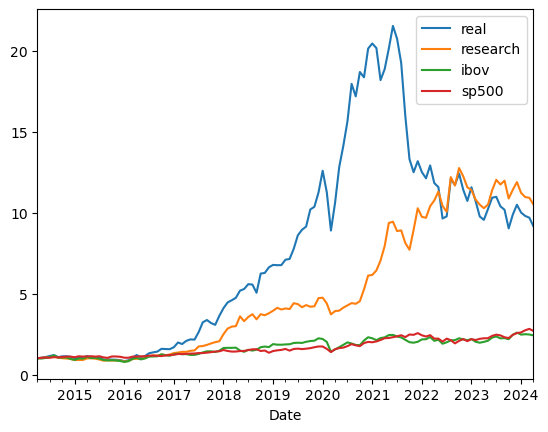

In [ ]:
#checkpoint de plot correto:
real_bal_portifolio['totalreturn'].plot(label='real')
portifolio['totalreturn'].plot(label='research')
ibov['Close'].plot(label='ibov')
sp500['Close'].plot(label='sp500')
plt.legend()

In [ ]:
# real_bal_portifolio['totalreturn'].plot(label='real_bal')
portifolio['totalreturn'].plot(label='research')
ibov['Close'].plot(label='ibov')
sp500['Close'].plot(label='sp500')
plt.legend()

## main (one stock analysis)

In [ ]:

ticket =ticker= 'KEPL3'

msft = yf.Ticker(ticket+'.SA')

data = msft.info
bvps = data.get('bookValue')
eps = data.get('trailingEps')
hist = msft.history(period="10y")
dfs = hist.copy()
dfs.dropna(inplace=True)

msft = yf.Ticker('^BVSP')

msft.info

hist = msft.history(period="10y")
dfb = hist.copy()

dfb = dfb.add_suffix('_ibo')
print(dfb.shape)
dfb.head()

(2479, 7)


,Open_ibo,High_ibo,Low_ibo,Close_ibo,Volume_ibo,Dividends_ibo,Stock Splits_ibo
Date,,,,,,,
2014-04-23 00:00:00-03:00,51975.0,51975.0,51400.0,51570.0,2844000,0.0,0.0
2014-04-24 00:00:00-03:00,51570.0,51963.0,51238.0,51817.0,3186900,0.0,0.0
2014-04-25 00:00:00-03:00,51817.0,51817.0,51019.0,51399.0,2954700,0.0,0.0
2014-04-28 00:00:00-03:00,51397.0,51471.0,50777.0,51384.0,2711300,0.0,0.0
2014-04-29 00:00:00-03:00,51386.0,52416.0,51386.0,51839.0,4326300,0.0,0.0


In [ ]:

df = dfs.join(dfb)
start_end = str(df.index[0])+' '+str(df.index[-1]) # variável de início e fim do intervalo
print(start_end)
df.head()


2014-04-23 00:00:00-03:00 2024-04-23 00:00:00-03:00


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_ibo,High_ibo,Low_ibo,Close_ibo,Volume_ibo,Dividends_ibo,Stock Splits_ibo
Date,,,,,,,,,,,,,,
2014-04-23 00:00:00-03:00,3.562452,3.585454,3.536575,3.584496,72000,0.000000,0.0,51975.0,51975.0,51400.0,51570.0,2844000.0,0.0,0.0
2014-04-24 00:00:00-03:00,3.567244,3.567244,3.474277,3.503030,226200,0.000000,0.0,51570.0,51963.0,51238.0,51817.0,3186900.0,0.0,0.0
2014-04-25 00:00:00-03:00,3.477152,3.593121,3.469485,3.545201,83400,0.000000,0.0,51817.0,51817.0,51019.0,51399.0,2954700.0,0.0,0.0
2014-04-28 00:00:00-03:00,3.583640,3.648727,3.552554,3.552554,265200,0.082617,0.0,51397.0,51471.0,50777.0,51384.0,2711300.0,0.0,0.0
2014-04-29 00:00:00-03:00,3.548669,3.558383,3.529240,3.554497,154200,0.000000,0.0,51386.0,52416.0,51386.0,51839.0,4326300.0,0.0,0.0


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_ibo,High_ibo,Low_ibo,Close_ibo,Volume_ibo,Dividends_ibo,Stock Splits_ibo
Date,,,,,,,,,,,,,,
2014-04-22 00:00:00-03:00,3.552868,3.579704,3.552868,3.559577,115800,0.000000,0.0,52112.000000,52460.000000,51682.000000,51977.000000,3492900.0,0.0,0.0
2014-04-23 00:00:00-03:00,3.562453,3.585455,3.536575,3.584496,72000,0.000000,0.0,51975.000000,51975.000000,51400.000000,51570.000000,2844000.0,0.0,0.0
2014-04-24 00:00:00-03:00,3.567244,3.567244,3.474277,3.503029,226200,0.000000,0.0,51570.000000,51963.000000,51238.000000,51817.000000,3186900.0,0.0,0.0
2014-04-25 00:00:00-03:00,3.477152,3.593121,3.469485,3.545200,83400,0.000000,0.0,51817.000000,51817.000000,51019.000000,51399.000000,2954700.0,0.0,0.0
2014-04-28 00:00:00-03:00,3.583641,3.648728,3.552555,3.552555,265200,0.082617,0.0,51397.000000,51471.000000,50777.000000,51384.000000,2711300.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 00:00:00-03:00,9.970000,10.060000,9.730000,9.930000,1167800,0.000000,0.0,125946.000000,126250.000000,125034.000000,125334.000000,13504500.0,0.0,0.0
2024-04-16 00:00:00-03:00,9.880000,10.150000,9.650000,9.980000,1114600,0.000000,0.0,125316.000000,125316.000000,123756.000000,124389.000000,14009800.0,0.0,0.0
2024-04-17 00:00:00-03:00,10.080000,10.130000,9.850000,9.910000,736100,0.000000,0.0,124389.000000,125301.000000,123642.000000,124171.000000,11370900.0,0.0,0.0


In [ ]:
grahan_marker = float((bvps*eps*22.5)**(1/2)) 
barsi_marker = float(df_fund.loc[ticker].dy*df_fund.loc[ticker].cotacao) *100/6
barsi_safe = barsi_marker *(2/3)
grahan_safe = grahan_marker*(2/3)


In [ ]:
fig = px.line(df,y='Close',x=df.index)
fig.add_hline(y=barsi_marker,annotation_text=f'Barsi lim: {round(barsi_marker,2)}', annotation_position="top left")
fig.add_hline(y=barsi_safe,line_color='green',annotation_text=f'Barsi safe: {round(barsi_safe,2)}', annotation_position="top left")
fig.add_hline(y=grahan_marker,line_color='yellow',annotation_text=f'Grahan lim: {round(grahan_marker,2)}', annotation_position="top left")
fig.add_hline(y=grahan_safe,line_color='yellowgreen',annotation_text=f'Grahan safe: {round(grahan_safe,2)}', annotation_position="top left")
fig.show() # see the last available and shall get the desired estimated

c:\Users\OtavioDaflon\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



0.17268532179188023

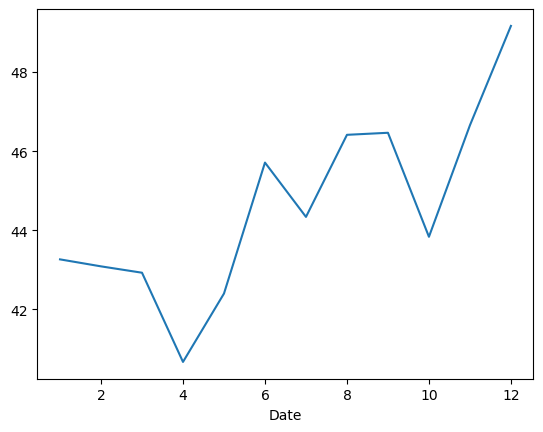

In [ ]:
# perfil sazonal simples:
df.index = pd.to_datetime(df.index)
df = df['2018-01-01':]
df.groupby(df.index.month).mean()['Close'].plot()
mdy=1-(df.groupby(df.index.month).mean()['Close'].min()/df.groupby(df.index.month).mean()['Close'].max())#monthly discrepancy
# [melhor mes compra 1, melhor mes compra 2,inttensidade da diferença de preço sazonal (%)]
stk={'BBAS3':[6,7,0.08],'CSNA3':[10,11,0.16],'FLRY3':[3,4,0.08],
     'ITSA4':[6,5,0.10],'KEPL3':[10,7,0.13],'KLBN4':[7,6,0.086],
     'MGLU3':[5,12,0.19],'QUAL3':[3,4,0.08],'TAEE4':[10,11,0.07],
     'UNIP3':[4,5,0.11]}
mdy


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_ibo,High_ibo,Low_ibo,Close_ibo,Volume_ibo,Dividends_ibo,Stock Splits_ibo
Date,,,,,,,,,,,,,,
2018-01-02 00:00:00-02:00,8.080186,8.152546,7.863106,8.147722,9240,0.0,0.0,76403.000000,77909.000000,76403.000000,77891.000000,2880300.0,0.0,0.0
2018-01-03 00:00:00-02:00,8.200781,8.441981,8.152542,8.200781,15120,0.0,0.0,77889.000000,78414.000000,77602.000000,77995.000000,3142200.0,0.0,0.0
2018-01-04 00:00:00-02:00,8.683181,8.823077,8.586701,8.649413,16240,0.0,0.0,77998.000000,79135.000000,77998.000000,78647.000000,3486100.0,0.0,0.0
2018-01-05 00:00:00-02:00,9.020861,9.020861,8.683181,8.707301,7700,0.0,0.0,78644.000000,79071.000000,78218.000000,79071.000000,2747100.0,0.0,0.0
2018-01-08 00:00:00-02:00,8.731422,9.165581,8.731422,9.025685,2800,0.0,0.0,79070.000000,79395.000000,78631.000000,79379.000000,2550800.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-10 00:00:00-03:00,60.000000,61.000000,60.000000,60.389999,19700,0.0,0.0,129872.000000,129872.000000,127732.000000,128054.000000,10451800.0,0.0,0.0
2024-04-11 00:00:00-03:00,60.480000,61.889999,60.029999,61.889999,8100,0.0,0.0,128051.000000,128051.000000,127069.000000,127396.000000,8882900.0,0.0,0.0
2024-04-12 00:00:00-03:00,61.520000,61.520000,60.009998,60.009998,13200,0.0,0.0,127396.000000,127640.000000,125635.000000,125946.000000,10246600.0,0.0,0.0


<Axes: xlabel='Date'>

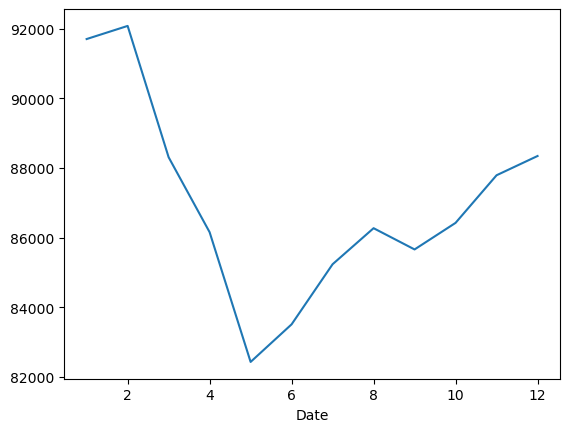

In [ ]:
dfb.index = pd.to_datetime(dfb.index)
dfb.groupby(dfb.index.month).mean()['Close_ibo'].plot()

## Breakpoints

In [ ]:
import ruptures as rpt
import warnings
import logging

In [ ]:

n_bkps = 5
algo = rpt.Dynp(model='rbf', min_size=3).fit(df['Close'].values)


result = algo.predict(n_bkps=n_bkps)

df['breakpoint'] = np.ones(len(df.index))
breaks = list(np.array(result) )#-1
breaks = breaks[:-1]
df.reset_index(inplace=True)
for j in result:
    df['breakpoint'][j] = -1 
#df.set_index('Date',inplace=True)

C:\Users\OtavioDaflon\AppData\Local\Temp\ipykernel_11224\983247629.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# coef=2.5
# data = df['Close'].copy()

# rolling_mean = data.rolling(12).mean()
# rolling_std = data.rolling(12).std()

# print('rolling_mean:',rolling_mean)
# print('rolling_std:', rolling_std)
# print('data:',data)
# df['std'] = rolling_std.values
# df['rollm'] = rolling_mean.values
# df['upper'] = df['rollm'] + coef*df['std']
# df['lower'] = df['rollm'] - coef*df['std']

# df['breakpoint'] = np.ones(len(df.index))
# breaks = list(df[(df['Close']>df['upper']) | (df['Close']<df['lower'])].index)#-1 
# print('breaks',breaks) 
# #breaks = simple
# for j in breaks:
#     print('index de anomalia:',j)
#     df['breakpoint'][j] = -1 # wrong?

In [ ]:

import plotly.graph_objects as go
figg = px.line(df,title=f'breakpoint model: {ticker}',y='Close',x='Date') 
figg.add_trace(go.Scatter(name="break points", x = df[df['breakpoint'] == -1]['Date'],y=df[df['breakpoint'] == -1]['Close'],mode='markers'))
figg.show()

c:\Users\OtavioDaflon\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\OtavioDaflon\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [ ]:
# anomaly periodic report
df.Date = pd.to_datetime(df['Date'])
try:
     del df['level_0']
except:
     print('no extra level')
perio = df[df['breakpoint']==-1].reset_index()
f =[diff_month(perio.loc[0].Date,perio.loc[1].Date),
     diff_month(perio.loc[1].Date,perio.loc[2].Date),
     diff_month(perio.loc[2].Date,perio.loc[3].Date)]

no extra level


[31  5  7]


<Axes: >

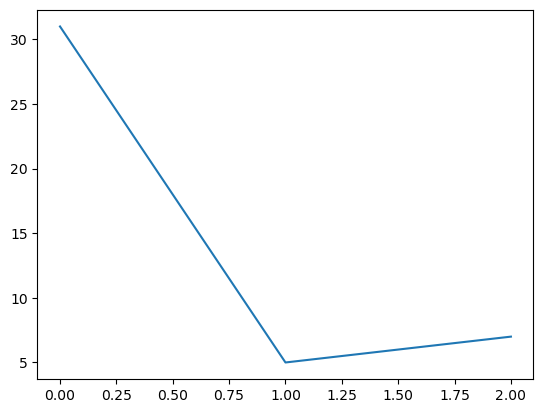

In [ ]:
# numero de meses que se demora a ter as mudanças de tedência mais relevantes do ativo:
print(np.array(f)*-1)
pd.Series(np.array(f)*-1).plot()

## Correlation

In [ ]:
import json
assets = json.load(open('../assets.json'))['personal_wallet']

In [ ]:
def get_data(ticket):

    msft = yf.Ticker(ticket+'.SA')
    df = msft.history(period="10y")['Close']
    df.index = pd.to_datetime(df.index)
    return df

dff = pd.DataFrame({})
for i in assets:
    dff[i] =  get_data(ticket=i)




ValueError: Length of values (1560) does not match length of index (2485)

In [ ]:
dff.dropna()

,BBAS3,CSNA3,FLRY3,ITSA4,KEPL3,KLBN4,MGLU3,TAEE4,UNIP3,MXRF11,VGIR11
Date,,,,,,,,,,,
2018-07-31 00:00:00-03:00,8.039578,6.391027,20.777454,6.118848,1.075844,2.537324,3.823089,3.900479,19.340195,7.717750,7.389235
2018-08-01 00:00:00-03:00,8.155842,6.425838,20.626631,6.253909,1.028304,2.529634,3.880899,3.900479,20.616196,7.756072,7.389235
2018-08-02 00:00:00-03:00,8.220160,6.655581,21.084999,6.289143,0.999366,2.521945,3.955766,3.900479,21.156620,7.756072,7.389235
2018-08-03 00:00:00-03:00,8.467531,6.718237,21.489887,6.477053,0.990065,2.468123,3.958945,3.842263,21.667021,7.748405,7.389235
2018-08-06 00:00:00-03:00,8.484846,6.648618,21.505173,6.383097,0.991099,2.525335,3.989007,3.970339,21.767101,7.756072,7.389235
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-10 00:00:00-03:00,28.799999,14.350000,14.700000,10.010000,10.560000,5.020000,1.770000,12.170000,60.389999,10.460000,9.839999
2024-04-11 00:00:00-03:00,28.870001,14.320000,14.800000,10.010000,10.490000,5.020000,1.730000,12.220000,61.889999,10.460000,9.830000
2024-04-12 00:00:00-03:00,28.495001,14.350000,14.720000,9.900000,9.900000,4.980000,1.660000,12.000000,60.009998,10.490000,9.810000


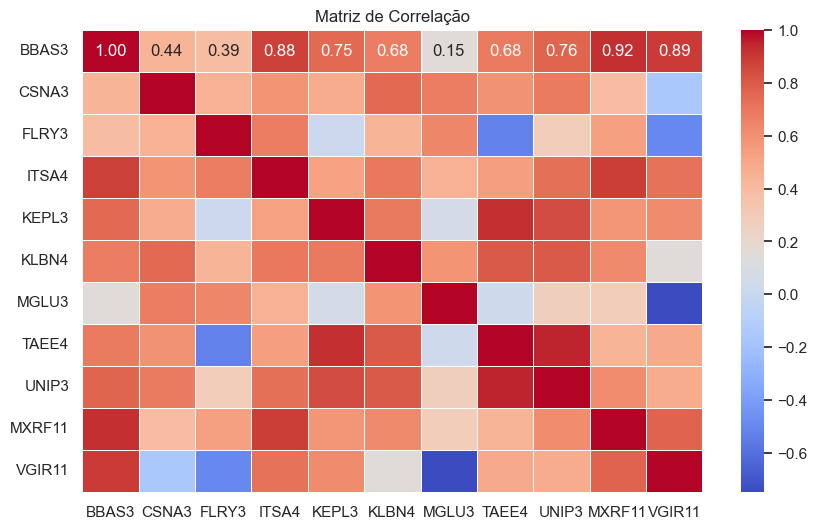

In [ ]:
mc = dff.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(mc, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

,BBAS3,CSNA3,FLRY3,ITSA4,KEPL3,KLBN4,MGLU3,TAEE4,UNIP3,MXRF11,VGIR11
BBAS3,1.000000,0.437635,0.391489,0.883654,0.750683,0.678348,0.151610,0.681184,0.764135,0.921515,0.893884
CSNA3,0.437635,1.000000,0.450297,0.583980,0.480969,0.749657,0.675007,0.592618,0.681800,0.394408,-0.157582
FLRY3,0.391489,0.450297,1.000000,0.677469,0.015522,0.436528,0.644682,-0.527263,0.286657,0.536088,-0.494990
ITSA4,0.883654,0.583980,0.677469,1.000000,0.523687,0.693126,0.450836,0.540179,0.722803,0.890783,0.715842
KEPL3,0.750683,0.480969,0.015522,0.523687,1.000000,0.691088,0.071440,0.924134,0.846107,0.582043,0.619365
KLBN4,0.678348,0.749657,0.436528,0.693126,0.691088,1.000000,0.590149,0.799689,0.801152,0.626915,0.147423
MGLU3,0.151610,0.675007,0.644682,0.450836,0.071440,0.590149,1.000000,0.033391,0.270515,0.285664,-0.746352
TAEE4,0.681184,0.592618,-0.527263,0.540179,0.924134,0.799689,0.033391,1.000000,0.949461,0.437597,0.488377
UNIP3,0.764135,0.681800,0.286657,0.722803,0.846107,0.801152,0.270515,0.949461,1.000000,0.617410,0.476331
MXRF11,0.921515,0.394408,0.536088,0.890783,0.582043,0.626915,0.285664,0.437597,0.617410,1.000000,0.772744
